In [170]:

import pandas as pd
import numpy as np

In [171]:
df=pd.read_csv("train_data.csv")
df_test=pd.read_csv("validation_data.csv")
df_promo=pd.read_csv("promotion_data.csv")


In [172]:
df['DateID'] = pd.to_datetime(df['DateID'])



In [173]:

df['month']= df['DateID'].dt.month
df['day']= df['DateID'].dt.day
df['week_of_month']=(df['day']//7)+1



In [174]:
df['week_of_year'] = df['DateID'].dt.week



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [175]:
cleanup_week_of_year = {"week_of_year":     {39: 1, 40: 2,41:3,42:4,43:5,44:6,45:7,46:8,47:9,48:10,49:11,50:12,51:13,52:14,1:15,2:16,3:17,4:18,5:19,6:20,7:21,8:22,9:23,10:24,11:25}}
df = df.replace(cleanup_week_of_year)


In [176]:
cleanup_month = {"month":     {10: 1, 11: 2,12:3,1:4,2:5,3:6}}
df = df.replace(cleanup_month)


In [177]:
df.drop('day', axis=1, inplace=True)



**Manupulating the validation dataset**

In [178]:
df["month"].value_counts()
df_test['WeekOG']=df_test['Week']
y_test=df_test["WeeklySales"]
df_test.drop('WeeklySales', axis=1, inplace=True)

cleanup_month_test = {"Week":     {"w1": 5, "w2": 5,"w3": 6,"w4": 6}}
df_test = df_test.replace(cleanup_month_test)
df_test = df_test.rename(columns={'Week': 'month'})


df_test['WeekOG2']=df_test['WeekOG']
cleanup_week_of_month_test = {"WeekOG":     {"w1": 3, "w2": 4,"w3": 1,"w4": 2}}
df_test = df_test.replace(cleanup_week_of_month_test)
df_test = df_test.rename(columns={'WeekOG': 'week_of_month'})

df_test['WeekOG3']=df_test['WeekOG2']
cleanup_week_of_year_test = {"WeekOG2":     {"w1": 22, "w2": 23,"w3": 24,"w4": 25}}
df_test = df_test.replace(cleanup_week_of_year_test)
df_test = df_test.rename(columns={'WeekOG2': 'week_of_year'})
df_test.drop('WeekOG3', axis=1, inplace=True)

cleanup_category_code = {"CategoryCode":     {"category_1": 1, "category_2": 2,"category_3": 3,"category_4": 4}}
df_test = df_test.replace(cleanup_category_code)
df = df.replace(cleanup_category_code)



df['WeeklySales']=df.groupby(['CategoryCode','ItemCode','week_of_year'])['DailySales'].transform(sum)
y_train=df['WeeklySales']
df.drop('DailySales', axis=1, inplace=True)
df.drop('DateID', axis=1, inplace=True)
df.drop('WeeklySales', axis=1, inplace=True)



In [179]:

x_train=df
x_test=df_test





In [180]:

df_realtest=pd.read_csv("test_data.csv")

df_realtest = df_realtest.replace(cleanup_category_code)


cleanup_month_test = {"Week":     {"w1": 5, "w2": 5,"w3": 6,"w4": 6}}
df_realtest = df_realtest.replace(cleanup_month_test)
df_realtest = df_realtest.rename(columns={'Week': 'month'})
df_realtest.drop("PredictedSales",axis=1, inplace=True)


In [181]:

# x_train.drop('week_of_month', axis=1, inplace=True)
# x_test.drop('week_of_month', axis=1, inplace=True)




Manipulating promotion dataset


In [182]:
x_promo=pd.read_csv('promotion_data.csv')
x_promo['PromotionStartDate'] = pd.to_datetime(x_promo['PromotionStartDate'])
x_promo['PromotionEndDate'] = pd.to_datetime(x_promo['PromotionEndDate'])
x_promo['PromotionMidDate'] =x_promo['PromotionStartDate']+pd.to_timedelta(3, unit='D')
x_promo.drop(columns=['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)
x_promo['month']= x_promo['PromotionMidDate'].dt.month
# x_promo['day']= df['DateID'].dt.day
x_promo['week_of_year'] = x_promo['PromotionMidDate'].dt.week
x_promo = x_promo.replace(cleanup_week_of_year)
cleanup_month = {"month":     {10: 1, 11: 2,12:3,1:4,2:5,3:6}}
x_promo = x_promo.replace(cleanup_month)
x_promo['OnPromo']=x_promo['DiscountValue']>0
cleanup_onpromo = {"OnPromo":     {True: 1, False:0}}
x_promo = x_promo.replace(cleanup_onpromo)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [183]:
x_promo_percentage=x_promo.loc[x_promo['DiscountType']=="Percentage"]
x_promo_amount=x_promo.loc[x_promo['DiscountType']=="Amount"]
x_promo_percentage['DiscountAmount']=x_promo_percentage['SellingPrice']*x_promo_percentage['DiscountValue']/100
x_promo_percentage['FinalPrice']=x_promo_percentage['SellingPrice']-x_promo_percentage['DiscountAmount']
x_promo_percentage = x_promo_percentage.rename(columns={'DiscountValue': 'Discount%'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [184]:
x_promo_amount['Discount%']= x_promo_amount['DiscountValue']/x_promo_amount['SellingPrice']
x_promo_amount['Discount%']=x_promo_amount['Discount%']*100

x_promo_amount = x_promo_amount.rename(columns={'DiscountValue': 'DiscountAmount'})
x_promo_amount['FinalPrice']=x_promo_amount['SellingPrice']-x_promo_amount['DiscountAmount']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [185]:
x_promo= pd.concat([x_promo_amount,x_promo_percentage], axis=0)

In [186]:
x_promo['week_of_year'].value_counts().sort_index()

2     10
3     10
4      8
5      8
6     20
7     20
8     22
9     18
10    14
11    18
12    16
13    15
14    13
15    12
17    14
18    13
19    11
20    11
21    15
22    13
23    11
24    11
25    11
Name: week_of_year, dtype: int64

In [187]:
x_promo_train=x_promo.loc[x_promo['week_of_year'] <22]
x_promo_val=x_promo.loc[x_promo['week_of_year'] >=22]

In [188]:
x_promo_val.shape

(46, 10)

In [189]:
x_train.shape

(20651, 5)

In [190]:
print(x_train.shape)
x_train_merged=pd.merge(x_train,x_promo_train, how="left")
x_val_merged=pd.merge(x_test,x_promo_val, how="left")
print(x_train_merged.shape)
# x_train_merged.drop(columns=['week_of_year','DiscountType','SellingPrice','PromotionMidDate','FinalPrice'],axis=1,inplace=True)
# x_val_merged.drop(columns=['week_of_year','DiscountType','SellingPrice','PromotionMidDate','FinalPrice'],axis=1,inplace=True)
x_train_merged.drop(columns=['DiscountType','SellingPrice','PromotionMidDate','FinalPrice'],axis=1,inplace=True)
x_val_merged.drop(columns=['DiscountType','SellingPrice','PromotionMidDate','FinalPrice'],axis=1,inplace=True)
x_train_merged = x_train_merged.replace(np.nan,0)
x_val_merged = x_val_merged.replace(np.nan,0)


(20651, 5)
(20651, 12)


In [191]:
duplicateRows = x_train_merged[x_train_merged.duplicated()]
x_train_merged.drop_duplicates(keep="first")
x_val_merged.drop_duplicates(keep="first")

,CategoryCode,ItemCode,month,OnPromo,week_of_month,week_of_year,DiscountAmount,Discount%
0,2,1006090,5,0,3,22,0.0,0.0
1,2,1105009,5,0,3,22,0.0,0.0
2,2,1098502,6,0,1,24,0.0,0.0
3,1,1081321,6,0,1,24,0.0,0.0
4,4,1074823,5,0,3,22,0.0,0.0
...,...,...,...,...,...,...,...,...
368,2,40759,5,0,3,22,0.0,0.0
369,2,1006090,5,0,4,23,0.0,0.0
370,1,1090303,5,0,3,22,0.0,0.0
371,2,1090276,6,0,1,24,0.0,0.0


In [192]:
# x_train_merged.drop('DiscountAmount', axis=1, inplace=True)
# x_val_merged.drop(	'DiscountAmount', axis=1, inplace=True)

In [193]:
# x_train_merged.drop('Discount%', axis=1, inplace=True)
# x_val_merged.drop('Discount%', axis=1, inplace=True)

Descriptive analysis

In [207]:
discounted=x_train_merged.loc[x_train_merged['Discount%']>0]


,CategoryCode,ItemCode,month,week_of_month,week_of_year,DiscountAmount,OnPromo,Discount%
21,1,379249,3,3,12,7.00,1.0,10.0
22,2,124954,5,2,20,21.00,1.0,10.0
34,1,1085749,3,3,12,7.00,1.0,10.0
69,1,119554,3,3,12,12.00,1.0,15.0
94,2,1101553,3,3,12,15.00,1.0,10.0
...,...,...,...,...,...,...,...,...
20591,1,35530,1,2,3,9.00,1.0,15.0
20598,2,39436,1,2,3,17.50,1.0,25.0
20623,2,65788,1,2,3,23.00,1.0,10.0
20628,2,267478,1,2,3,13.00,1.0,10.0


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fe3e66ce7a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


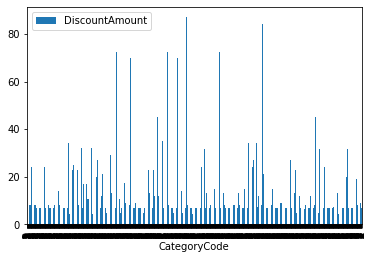

In [194]:
# x_train_merged.loc[x_train_merged['Discount%']>0].mean().plot(kind='bar')
# columns=['CategoryCode', 'ItemCode', 'month', 'DiscountAmount', 'OnPromo','Discount%']
x_train_merged.loc[x_train_merged['Discount%']>0].plot(kind='bar', x = 'CategoryCode', y = 'DiscountAmount')

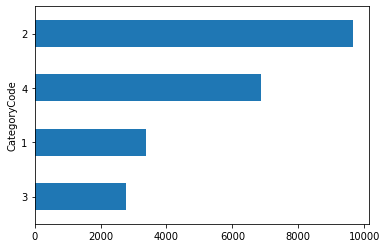

In [198]:
cat_discount = x_train_merged.groupby("CategoryCode")["DiscountAmount"].sum().sort_values()
cat_discount.plot(kind="barh", fontsize=10)

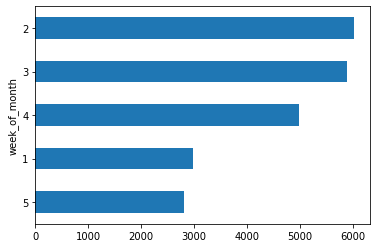

In [199]:

cat_discount = x_train_merged.groupby("week_of_month")["DiscountAmount"].sum().sort_values()
cat_discount.plot(kind="barh", fontsize=10)

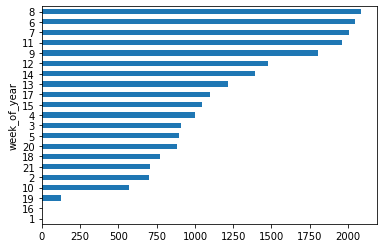

In [200]:
cat_discount = x_train_merged.groupby("week_of_year")["DiscountAmount"].sum().sort_values()
cat_discount.plot(kind="barh", fontsize=10)

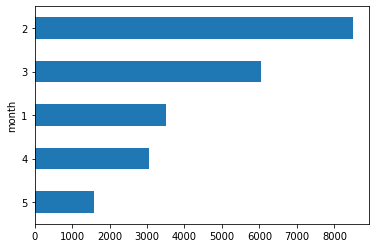

In [201]:
cat_discount = x_train_merged.groupby("month")["DiscountAmount"].sum().sort_values()
cat_discount.plot(kind="barh", fontsize=10)

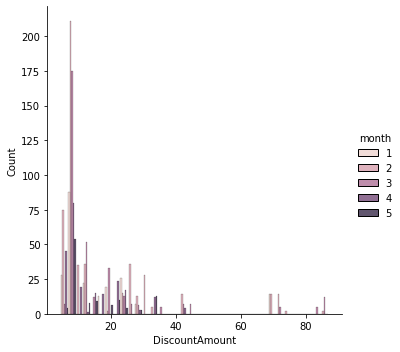

In [213]:
import seaborn as sns
sns.displot(discounted, x="DiscountAmount", hue="month", multiple="dodge")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


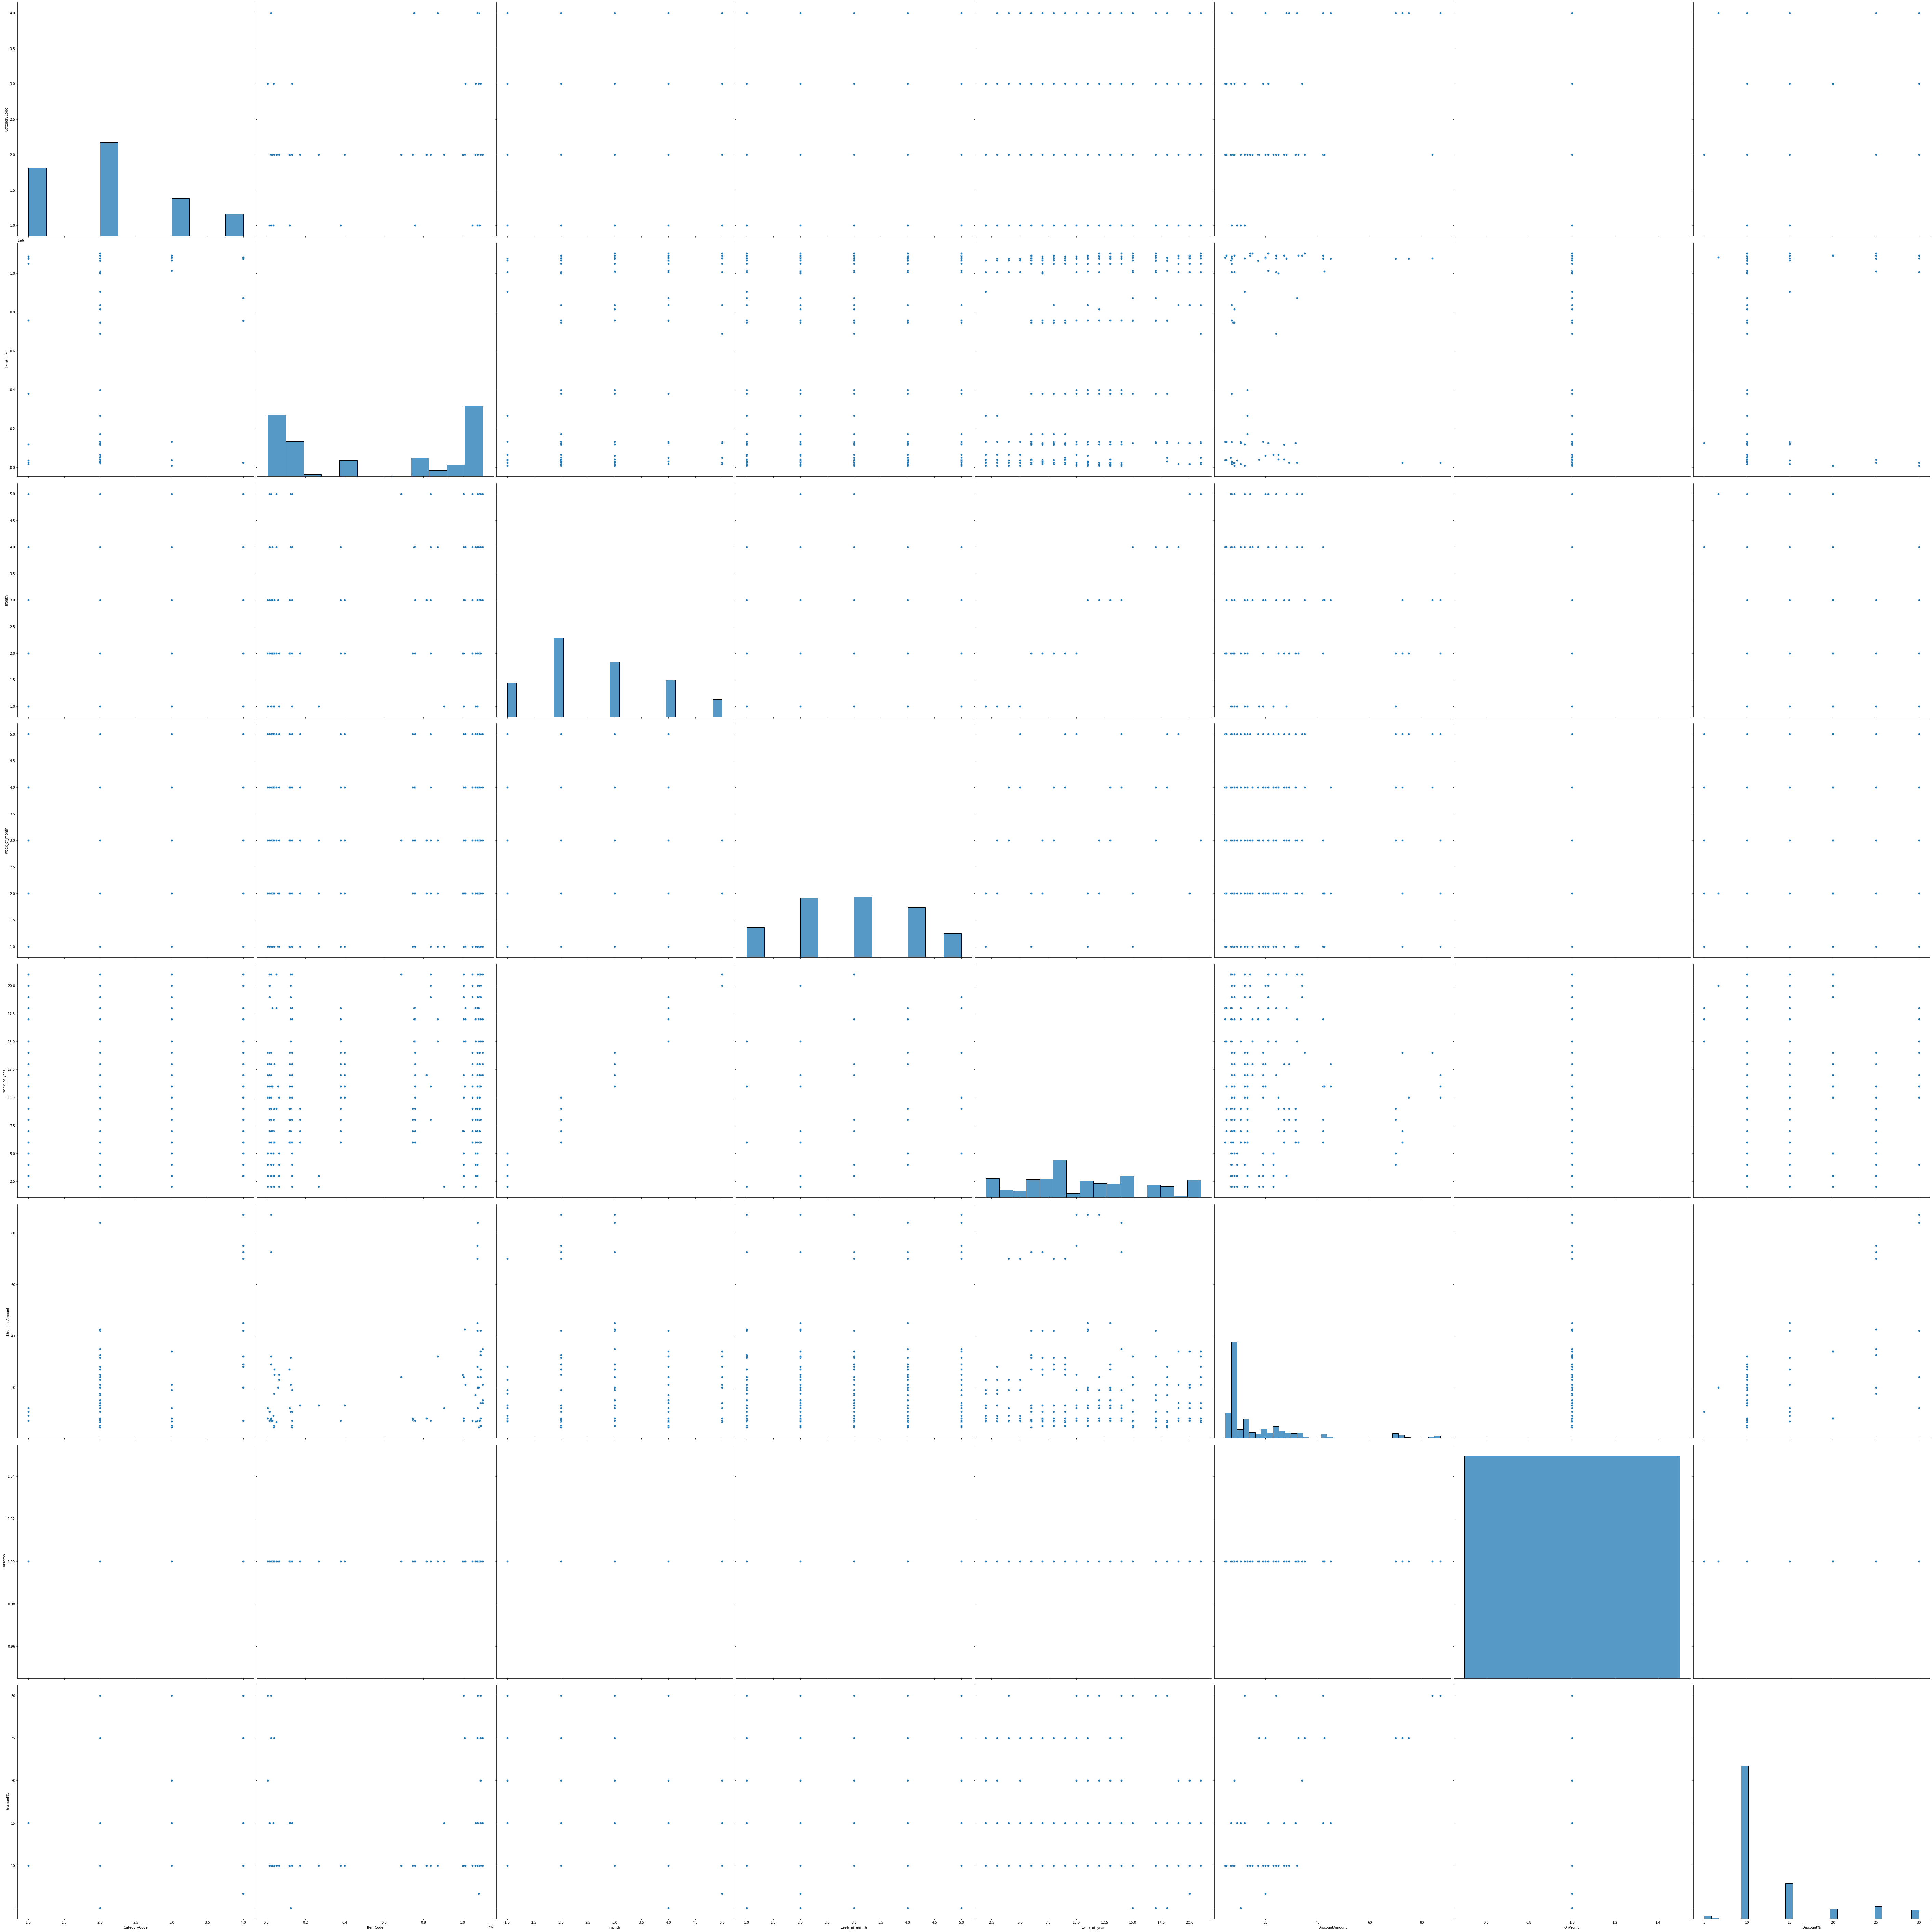

In [219]:
sns.pairplot(discounted,size=10)

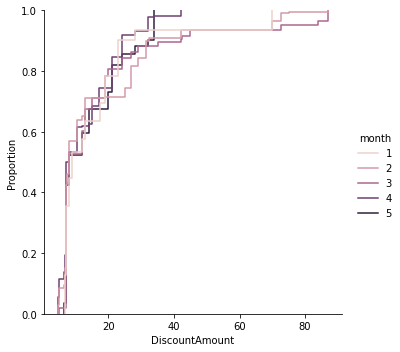

In [224]:
sns.displot(discounted, x="DiscountAmount", kind="ecdf", hue="month")

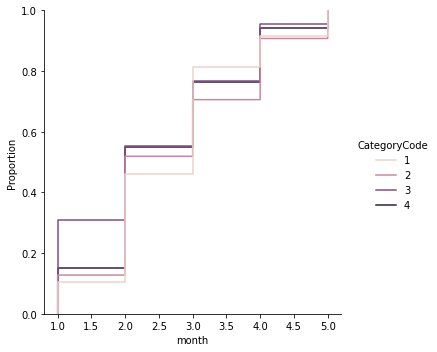

In [230]:
sns.displot(discounted, x="month", kind="ecdf", hue="CategoryCode")

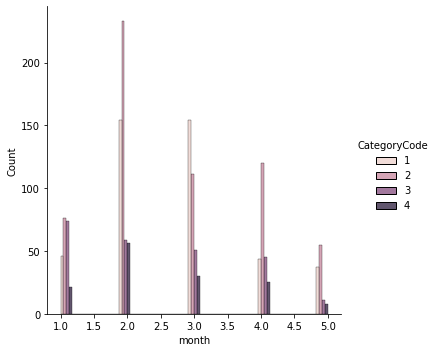

In [232]:
sns.displot(discounted, x="month", hue="CategoryCode",multiple="dodge")

In [236]:
discounted.mode()

,CategoryCode,ItemCode,month,week_of_month,week_of_year,DiscountAmount,OnPromo,Discount%
0,2,379249,2,3,8,7.0,1.0,10.0


In [237]:
discounted.columns

Index(['CategoryCode', 'ItemCode', 'month', 'week_of_month', 'week_of_year',
       'DiscountAmount', 'OnPromo', 'Discount%'],
      dtype='object')

In [238]:
columns=[ 'month', 'week_of_month', 'week_of_year',
       'DiscountAmount', 'OnPromo', 'Discount%']
for column in columns:
  Q1 = np.nanpercentile(discounted[column], 25, interpolation = 'midpoint')
  Q2 = np.nanpercentile(discounted[column], 50, interpolation = 'midpoint')  
  Q3 = np.nanpercentile(discounted[column], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  print(column,IQR)

month 1.0
week_of_month 2.0
week_of_year 7.0
DiscountAmount 13.0
OnPromo 0.0
Discount% 5.0


In [239]:
columns=[ 'month', 'week_of_month', 'week_of_year',
       'DiscountAmount', 'OnPromo', 'Discount%']
for column in columns:
  
  print(column,discounted[column].max()-discounted[column].min())

month 4
week_of_month 4
week_of_year 19
DiscountAmount 82.5
OnPromo 0.0
Discount% 25.0


In [241]:
discounted.std()

CategoryCode           0.934276
ItemCode          458175.878025
month                  1.156521
week_of_month          1.202102
week_of_year           5.204334
DiscountAmount        16.107022
OnPromo                0.000000
Discount%              5.406951
dtype: float64

In [242]:
discounted.var()

CategoryCode      8.728715e-01
ItemCode          2.099251e+11
month             1.337541e+00
week_of_month     1.445049e+00
week_of_year      2.708509e+01
DiscountAmount    2.594361e+02
OnPromo           0.000000e+00
Discount%         2.923512e+01
dtype: float64

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error

lgbm=lgb.LGBMRegressor(n_estimators=2000,learning_rate=0.3)

lgbm.fit(x_train_merged,y_train)
y_pred=(lgbm.predict(x_val_merged))
mean_absolute_percentage_error(y_test,y_pred)
print("mean_absolute_percentage_error",mean_absolute_percentage_error(y_test,y_pred))
from sklearn.metrics import mean_squared_error,r2_score
print("r2_score",r2_score(y_test,y_pred))
print(abs(y_pred-y_test).sum()/(y_test.sum()))

In [ ]:

# n_estimators = [100, 200, 300, 400, 500,600,700, 800, 900, 1000,1100, 1200, 1300, 1400, 1500,1600,1700, 1800, 1900, 2000,2100, 2200, 2300, 2400, 2500,2600,2700, 2800, 2900, 3000,3100, 3200, 3300, 3400, 3500,3600,3700, 3800, 3900, 4000]
# learning_rate = [0.0001, 0.001, 0.01, 0.1,0.2,0.3]
# total_mape_scores=[1]
# for x in n_estimators:
#   for y in learning_rate:
    
#     lgbm=lgb.LGBMRegressor(n_estimators=x,learning_rate=y)
#     lgbm.fit(x_train_merged,y_train)
#     y_pred=(lgbm.predict(x_val_merged))
#     mean_absolute_percentage_error(y_test,y_pred)
    
#     from sklearn.metrics import mean_squared_error,r2_score
    
#     if (min(total_mape_scores)>(abs(y_pred-y_test).sum()/(y_test.sum()))):
#       total_mape_scores.append(abs(y_pred-y_test).sum()/(y_test.sum()))
     
#       print(x,y)
#       print("mean_absolute_percentage_error",mean_absolute_percentage_error(y_test,y_pred))
#       print("r2_score",r2_score(y_test,y_pred))
#       print(abs(y_pred-y_test).sum()/(y_test.sum()))
# print(min(total_mape_scores))

In [ ]:
# print("mean_absolute_percentage_error",mean_absolute_percentage_error(y_test,y_pred))
# from sklearn.metrics import mean_squared_error,r2_score
# print("r2_score",r2_score(y_test,y_pred))
# print(abs(y_pred-y_test).sum()/(y_test.sum()))
# d1 = pd.Series(y_pred,name='PredictedSales')
# df=pd.concat([y_test, d1], axis=1)
# # df


In [ ]:
# df=pd.read_csv("test_data.csv")
# df['random'] = df['ItemCode'].astype(str)
# df['ID']=df['CategoryCode']+'_'+df['random']+'_'+df['Week']
# df
# df2=df["ID"]
# df3=pd.DataFrame(df2)
# df3["WeeklySales"]=y_final_pred
# df3.to_csv("submission8.csv",index=False)

In [ ]:
# import xgboost as xgb

# xgbr = xgb.XGBRegressor(learning_rate=0.3,n_estimators=4300,objective='reg:squarederror')




# xgbr.fit(x_train, y_train)
# ypred = xgbr.predict(df_realtest)
# df_ypred=pd.DataFrame(ypred)

# df=pd.read_csv("test_data.csv")
# df['random'] = df['ItemCode'].astype(str)
# df['ID']=df['CategoryCode']+'_'+df['random']+'_'+df['Week']
# df
# df2=df["ID"]
# df3=pd.DataFrame(df2)
# df3["WeeklySales"]=df_ypred
# df3.to_csv("submission8.csv",index=False)



In [ ]:
# df3

In [ ]:
# from sklearn.metrics import mean_squared_error,r2_score
# r2_score(y_test,df_y_pred2)



In [ ]:
# (abs(y_pred2-y_test).sum())/(y_test.sum())
